First few rows of the dataset:
   Unnamed: 0 first_name    last_name                      name  year  rank  \
0           0        Les  12 Poissons      Rondo pour trompette  2002   NaN   
1           1    Lejaren     a'Hiller  Sleep of Cyma Roget, The  1920   NaN   
2           2   Khairiya    A-Mansour          Churches in Iraq  1988   NaN   
3           3    Ricardo     A. Solla                  Foto, La  2001   NaN   
4           4    Ricardo     A. Solla                  Foto, La  2001   NaN   

         genre  
0        Short  
1        Drama  
2  Documentary  
3        Drama  
4        Short  

Missing data in each column:
Unnamed: 0         0
first_name         0
last_name          0
name               0
year               0
rank          255518
genre              0
dtype: int64

First few rows of the cleaned dataset:
    Unnamed: 0             name  year  rank        genre         director
77          77     Cleaning Up!  2002   8.3  Documentary  Rostislav Aalto
78          78

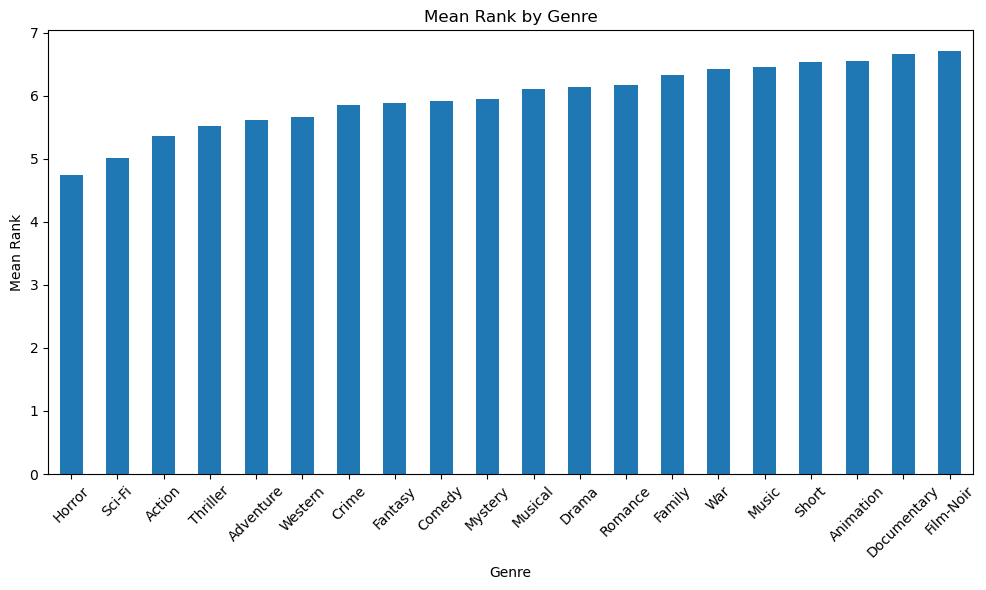

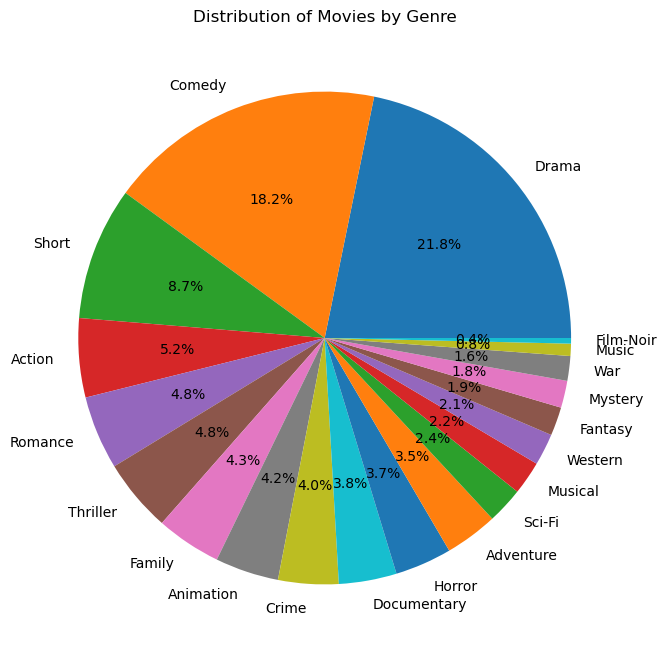

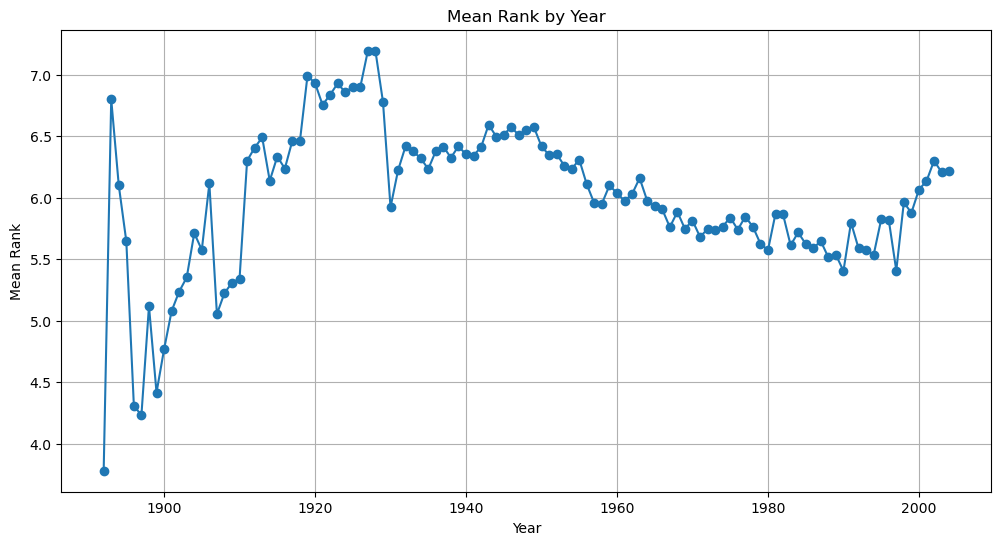

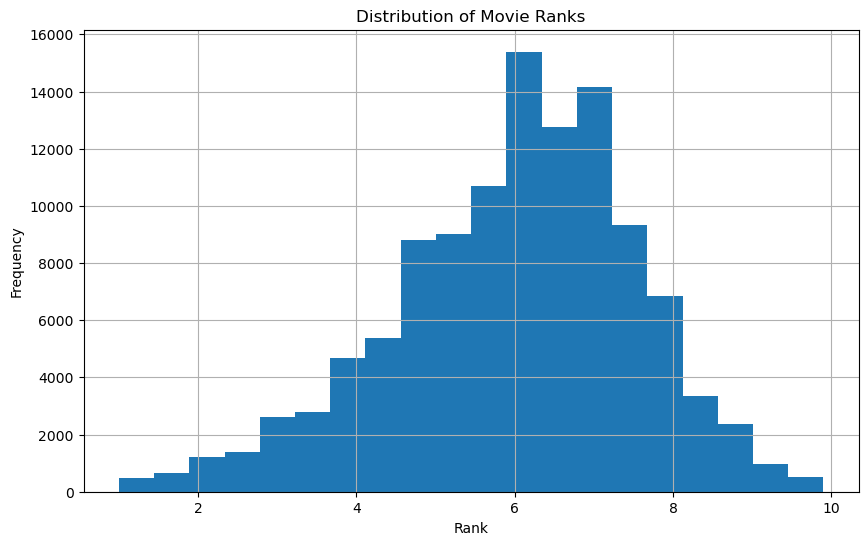


Correlation matrix:
            Unnamed: 0      year      rank
Unnamed: 0    1.000000  0.051005 -0.000074
year          0.051005  1.000000 -0.110070
rank         -0.000074 -0.110070  1.000000


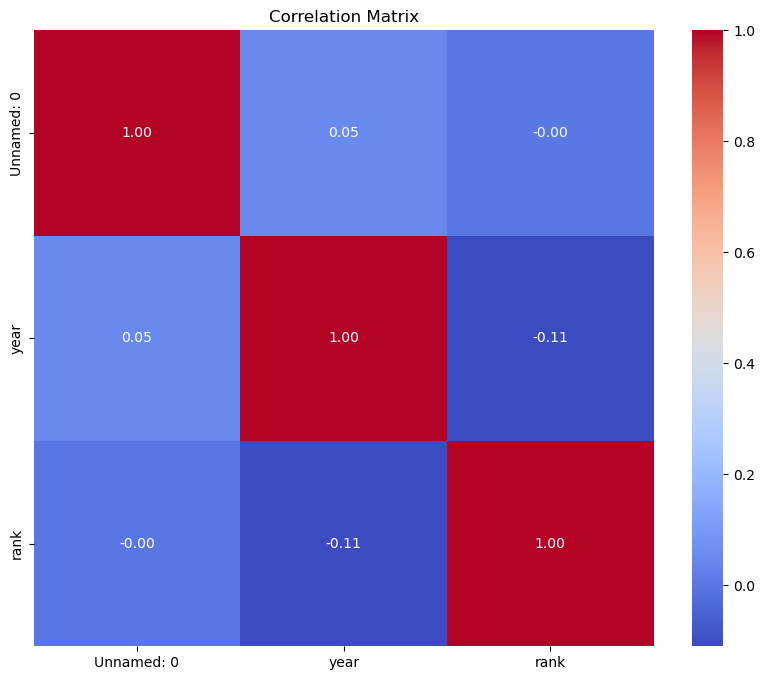


Number of movies by each director:
director
Friz Freleng           1025
Chuck (I) Jones         984
Dave Fleischer          738
Robert McKimson         697
Tex Avery               509
                       ... 
Tom Lau Moon-Tong         1
Anthony Lau               1
Bowie Lau                 1
Kenneth Hau Wai Lau       1
Idil Üner                 1
Name: count, Length: 22104, dtype: int64


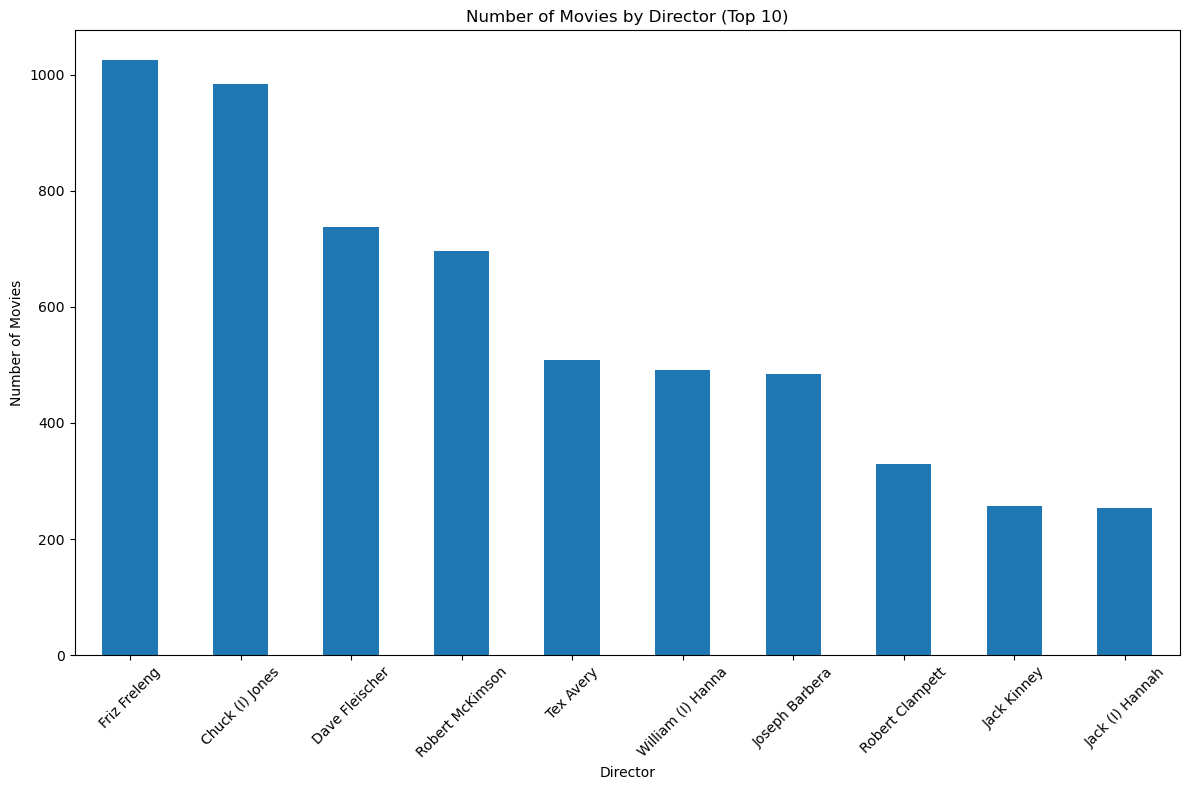

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"
df = pd.read_csv(url)

# Inspect the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check for missing data
print("\nMissing data in each column:")
print(df.isnull().sum())

# Remove rows with missing data
df_cleaned = df.dropna().copy()  # Use .copy() to avoid SettingWithCopyWarning

# Combine 'first_name' and 'last_name' into 'director'
if 'first_name' in df_cleaned.columns and 'last_name' in df_cleaned.columns:
    df_cleaned['director'] = df_cleaned['first_name'] + ' ' + df_cleaned['last_name']
    df_cleaned = df_cleaned.drop(columns=['first_name', 'last_name'])

# Inspect the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(df_cleaned.head())

# Check for missing data in the cleaned dataset
print("\nMissing data in each column of the cleaned dataset:")
print(df_cleaned.isnull().sum())

# Count the number of rows in the cleaned dataset
print("\nNumber of rows in the cleaned dataset:")
print(len(df_cleaned))

# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'cleaned_movies.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}")

# Load the cleaned dataset
df = pd.read_csv(cleaned_file_path)

# Print column names and data types
print("Column names in the dataset:")
print(df.columns)

print("\nData types of each column:")
print(df.dtypes)

# 1. How many movies of each genre are there?
print("\nNumber of movies in each genre:")
genre_counts = df['genre'].value_counts()
print(genre_counts)

# 2. Which director has the highest ranked movies?
if 'director' in df.columns and 'rank' in df.columns:
    highest_ranked_director = df.loc[df['rank'].idxmax(), 'director']
    highest_rank = df['rank'].max()
    print(f"\nDirector with the highest ranked movie(s): {highest_ranked_director} (Rank: {highest_rank})")
else:
    print("\n'Genre', 'director', or 'rank' columns are missing for analysis.")

# 3. How many movies have ranks of over 9?
if 'rank' in df.columns:
    high_rank_count = df[df['rank'] > 9].shape[0]
    print(f"\nNumber of movies with ranks over 9: {high_rank_count}")

# 4. Plot a bar chart of mean rank and genre
if 'genre' in df.columns and 'rank' in df.columns:
    mean_rank_by_genre = df.groupby('genre')['rank'].mean().sort_values()
    plt.figure(figsize=(10, 6))
    mean_rank_by_genre.plot(kind='bar')
    plt.title('Mean Rank by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Mean Rank')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 5. Plot a pie chart of how many movies of each genre there are
plt.figure(figsize=(8, 8))
genre_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Movies by Genre')
plt.ylabel('')
plt.show()

# 6. Plot a graph showing the mean Rank for each year
if 'year' in df.columns and 'rank' in df.columns:
    mean_rank_by_year = df.groupby('year')['rank'].mean().sort_index()
    plt.figure(figsize=(12, 6))
    mean_rank_by_year.plot(kind='line', marker='o')
    plt.title('Mean Rank by Year')
    plt.xlabel('Year')
    plt.ylabel('Mean Rank')
    plt.grid(True)
    plt.show()
else:
    print("\n'Year' or 'rank' column is missing for analysis.")

# 7. Additional insights
# Distribution of ranks (histogram)
if 'rank' in df.columns:
    plt.figure(figsize=(10, 6))
    df['rank'].hist(bins=20)
    plt.title('Distribution of Movie Ranks')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Correlation matrix to understand relationships between numeric features
numeric_df = df.select_dtypes(include=['number'])
if not numeric_df.empty:
    correlation_matrix = numeric_df.corr()
    print("\nCorrelation matrix:")
    print(correlation_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("\nNo numeric columns found for correlation analysis.")

# Example: Count of movies by director (if 'director' column exists)
if 'director' in df.columns:
    director_counts = df['director'].value_counts()
    print("\nNumber of movies by each director:")
    print(director_counts)

    # Plot a bar chart for the top 10 directors
    plt.figure(figsize=(12, 8))
    director_counts.head(10).plot(kind='bar')
    plt.title('Number of Movies by Director (Top 10)')
    plt.xlabel('Director')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
